This is an example of using superposition to find the deflection in a beam when you have combined loadings.

In [1]:
from sympy import *
init_printing()

This is a convenience function for printing a symbol equated to an expression.

In [2]:
def print_eq(sym, expr):
    return Eq(sympify(sym), expr)

Create some symbols for the beam geometry, loads, and material properties.

In [3]:
x, F, b, E, I, l, w, a = symbols('x, F, b, E, I, l, w, a', real=True)

Now create expressions for the deflection of each beam that are found in the simple beam deflection tables.

First equations for the concentrated load:

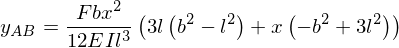

In [4]:
y_AB = F * b * x**2 / 12 / E / I / l**3 * (3 * l * (b**2 - l**2) + x * (3 * l**2 - b**2))

print_eq('y_AB', y_AB)

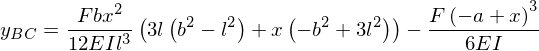

In [5]:
y_BC = y_AB - F * (x - a)**3 / 6 / E / I

print_eq('y_BC', y_BC)

And then the single equation for the distributed load:

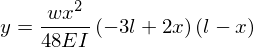

In [6]:
y = w * x**2 / 48 / E / I * (l - x) * (2 * x - 3 * l)

print_eq('y', y)

Now superimpose the deflection equations for each section of the beam:

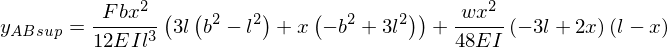

In [7]:
y_AB_sup = y_AB + y

print_eq('y_ABsup', y_AB_sup)

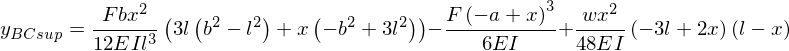

In [8]:
y_BC_sup = y_BC + y

print_eq('y_BCsup', y_BC_sup)

The order of the polynomial that describes the deflection is four and can easily be seen if you expand and then collect terms with respect to $x$.

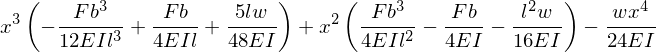

In [9]:
y_AB_sup.expand().collect(x)

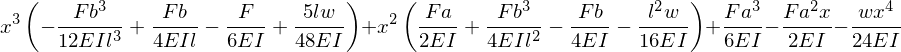

In [10]:
y_BC_sup.expand().collect(x)

The slope can be found by differentiating the deflection curve with respect to $x$.

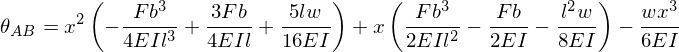

In [11]:
theta_AB = y_AB_sup.diff(x).expand().collect(x)

print_eq('theta_AB', theta_AB)

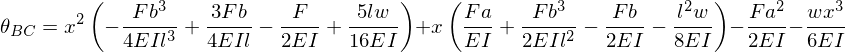

In [12]:
theta_BC = y_BC_sup.diff(x).expand().collect(x)

print_eq('theta_BC', theta_BC)

At this point we solve these expressions for x when the expression is equal to zero to find the location of maximum deflection. SymPy can solve polynomials of order 1 to 4 symbolically, but it generally isn't worth doing, so at this point let's substitute in some numerical values.

In [13]:
vals = {E: 30E6,  # psi
        I: 5,  # in^4
        w: 100 / 12,  # lb/in
        F: 1000,  # lb
        a: 7 * 12,  # in
        b: 3 * 12,  # in
        l: 10 * 12}  # in

In [14]:
theta_AB.subs(vals)

In [15]:
theta_BC.subs(vals)

The roots of the third order polynomials can be found easily using SymPy's `solveset` function which uses iterative methods to find the solution. *Note that `solveset` assumes that the expression is equal to zero by default.*

In [16]:
solveset(theta_AB.subs(vals), x)

In [17]:
solveset(theta_BC.subs(vals), x)

Note that there are three roots for each of the sections of the beams. The only roots that lie within the corresponding section of the beams are $x=0 \textrm{ in}$ and $x=73.11 \textrm{ in}$. All of the other roots lie outside of the section in question. The maximum point we are looking for is thus at $x=73.11 \textrm{ in}$. The maximun deflection is then calculated by substituting in this $x$ value:

In [18]:
print_eq('y_max', y_AB.subs(vals).subs({x: 73.1117662899279}))

It is very easy to plot the functions too.

In [19]:
%matplotlib notebook

<IPython.core.display.Javascript object>


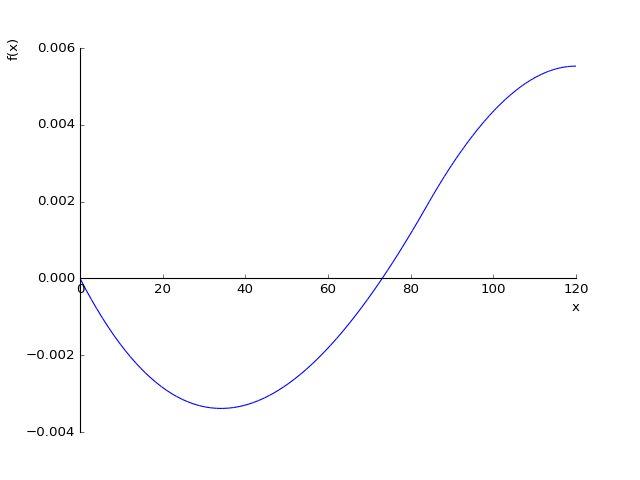

In [20]:
plot((theta_AB.subs(vals), (x, 0, vals[a])),
     (theta_BC.subs(vals), (x, vals[a], vals[l])));

<IPython.core.display.Javascript object>


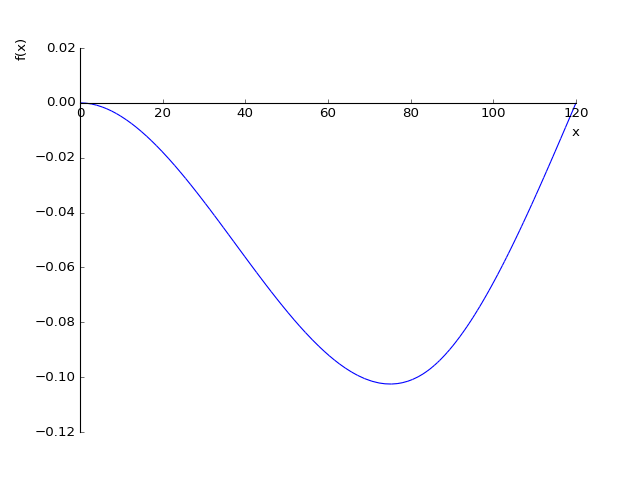

In [21]:
plot((y_AB.subs(vals), (x, 0, vals[a])),
     (y_BC.subs(vals), (x, vals[a], vals[l])));

*Note that the `solve` function fails to find this solution and needs to be reported as bug to SymPy.*

In [22]:
solve(theta_AB.subs(vals), x)

In [23]:
solve(theta_BC.subs(vals), x)